### Netflix Movies & TV Shows Analysis using Python

This is a data visualization project focused on Netflix. The dataset consists of 8000 Netflix data points sourced from Kaggle, and is used to demonstrate data visualization techniques through exploratory data analysis (EDA). The project will be divided into two parts:

#### Part 1: Exploratory Data Analysis
EDA is a preliminary data analysis technique to understand the dataset's properties, identify patterns, and prepare the data for further analysis. It involves summarizing the main characteristics of the data using statistical and visualization methods.

#### Part 2: Data cleaning
This will involve taking a basic look at the dataset, performing data cleaning, and correcting data types.

#### Part 3: Visualization
This will include creating an overall picture of the dataset, analyzing the differences between movies and TV shows, and investigating any changes that occurred after 2019.

#### Part 1: Exploratory Data Analysis

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import cm
sns.set_style('whitegrid')
df = pd.read_csv("C:/Users/surve/Downloads/netlix 2/archive/netflix_raw.csv")

In [16]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [17]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
# checking missing data in stack data 
df_clean = df.copy()
total = df_clean.isnull().sum().sort_values(ascending = False)
percent = (df_clean.isnull().sum()/df_clean.isnull().count()*100).sort_values(ascending = False)
missing_df_clean = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_df_clean

,Total,Percent
director,2634,29.908028
country,831,9.435676
cast,825,9.367549
date_added,10,0.113546
rating,4,0.045418
duration,3,0.034064
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000


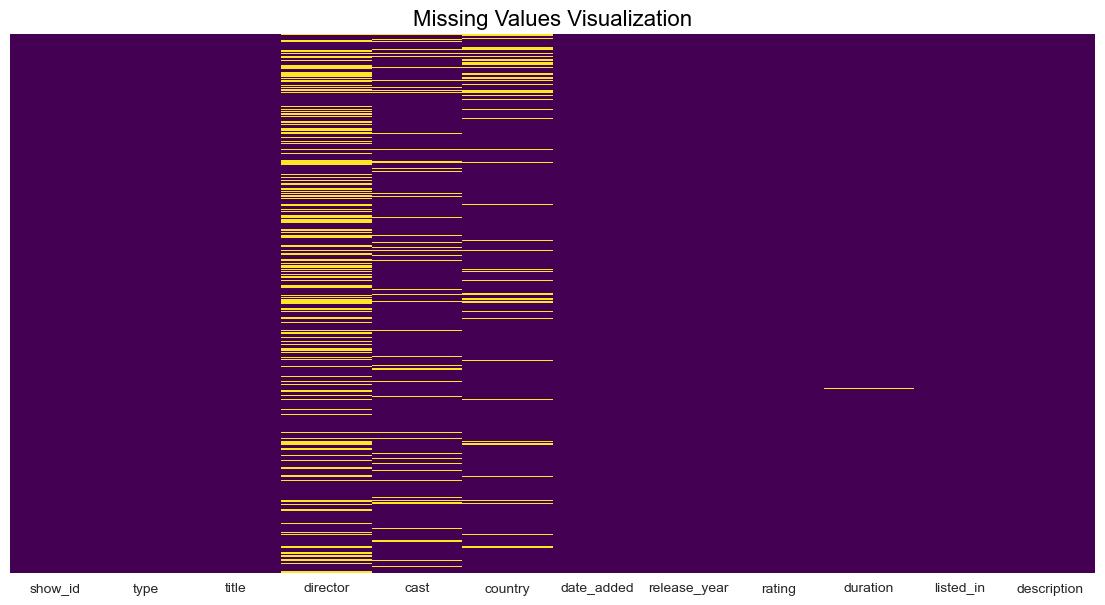

In [19]:
f,ax=plt.subplots(figsize=(14,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax)
ax.set_title('Missing Values Visualization',fontsize=16,color='black')
plt.show()

#### Part 2: Data cleaning

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [21]:
df = pd.read_csv("C:/Users/surve/Downloads/netlix 2/archive/netflix_titles.csv")
df.head(5)

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
3,12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
4,24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


#### Deal with Null
It seems there are some NaN values, so we need to clean them. First, we check each attribute's NaN rate

In [22]:
check = True
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))
        check = False
if check:
    print('Data Fram no null')

Data Fram no null


Then, we clean country, cast, director.

In [23]:
# Replacments
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops
df.dropna(inplace=True)

# Drop Duplicates
df.drop_duplicates(inplace= True)

df.isnull().sum()

Unnamed: 0      0
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now, we check NaN rate again.

In [24]:
check = True
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))
        check = False
if check:
    print('Data Fram no null')

Data Fram no null


#### Data type

In [25]:
df.dtypes

Unnamed: 0       int64
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

It seems we need to do some works.
1. date_added should be datetime
2. create month_added (int), month_name_added (str), and year_added (int) attributes

In [26]:
df["date_added"] = pd.to_datetime(df['date_added'])

# Create month_added and year_added
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [27]:
df.dtypes

Unnamed: 0                   int64
show_id                     object
type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
description                 object
month_added                  int64
month_name_added            object
year_added                   int64
dtype: object

It looks better now.

Now, I found some films have multiple countries. So, we create 'first_country' and use first country as representive. In addition, we also create another attribute to store genre list.

In [28]:
# Helper column for various plots
df['count'] = 1

# Lets retrieve just the first country
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].head()

# Genre
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

# Reducing name length
df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

In [29]:
df.head(5)

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,count,first_country,genre
0,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,September,2021,1,USA,"[Dramas, Independent Movies, International Mov..."
1,8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,September,2021,1,UK,"[British TV Shows, Reality TV]"
2,9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,September,2021,1,USA,"[Comedies, Dramas]"
3,12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,9,September,2021,1,Germany,"[Dramas, International Movies]"
4,24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,9,September,2021,1,India,"[Comedies, International Movies, Romantic Movies]"


In [30]:
df.to_csv(r"C:\Users\surve\Downloads\Netflix_new.csv")

#### Part 3: Visualization

In [31]:
# Define color
color_movie = '#b20710'
color_TV = '#221f1f'

What is the current trend by years in movies and TV shows?
Netflix releases a hundreds movies and TV shows every year and we want to see its trend in the past few decades.

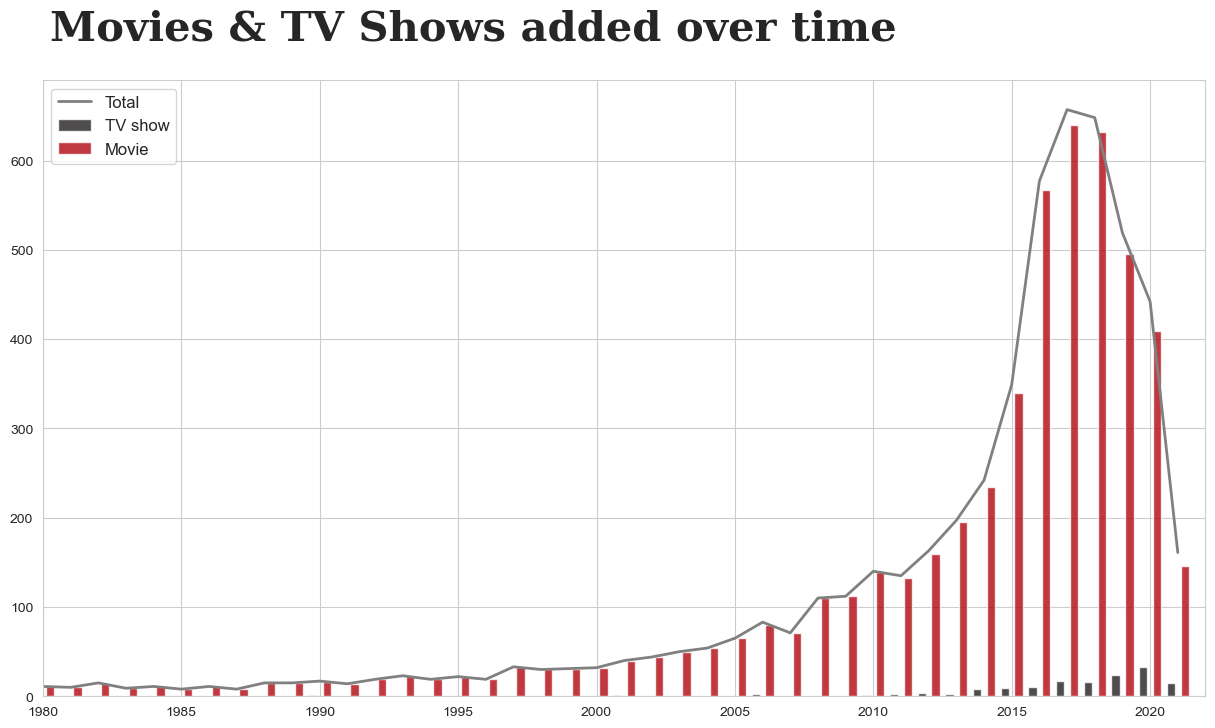

In [32]:
col = 'release_year'
df1 = df[df['release_year'] >= 1980]

df_sortYear = df1[col].value_counts().reset_index()
df_sortYear = df_sortYear.rename(columns = {col:'Total', 'index':col})
df_sortYear = df_sortYear.sort_values(col)

df_TVs = df1[df1['type'] == 'TV Show']
df_Movies = df1[df1['type'] == 'Movie']

df_sortYear_TVs = df_TVs[col].value_counts().reset_index()
df_sortYear_TVs = df_sortYear_TVs.rename(columns = {col:'TV show', 'index':col})
df_sortYear_TVs = df_sortYear_TVs.sort_values(col)

df_sortYear_Movies = df_Movies[col].value_counts().reset_index()
df_sortYear_Movies = df_sortYear_Movies.rename(columns = {col:'Movie', 'index':col})
df_sortYear_Movies = df_sortYear_Movies.sort_values(col)

df_total = pd.merge(df_sortYear, df_sortYear_TVs, how = 'left', left_on = 'release_year', right_on = 'release_year')
df_total = pd.merge(df_total, df_sortYear_Movies, how = 'left', left_on = 'release_year', right_on = 'release_year')

fig, ax1 = plt.subplots(1,1,figsize = (15,8))
width = 0.5
ax1.plot(df_total[col], df_total['Total'], label = 'Total', linewidth = 2, color = 'grey')
ax1.bar(df_total[col] - width/2, df_total['TV show'], alpha = 0.8, width = 0.3, label = 'TV show', color = color_TV)
ax1.bar(df_total[col] + width/2, df_total['Movie'], alpha = 0.8, width = 0.3, label = 'Movie', color = color_movie)

fig.text(0.13, 0.93, 'Movies & TV Shows added over time', fontsize=30, fontweight='bold', fontfamily='Serif') 
ax1.legend(loc = 'upper left', fontsize = 'large')

ax1.annotate("2019",
            xy=(2018, 1150),
            xytext=(2015, 1100),
            xycoords='data',
            size=20, va="center", ha="center",
            arrowprops=dict(arrowstyle="->",fc="black"))

plt.xlim([1980,2022])
plt.show()

Based on the results, we can observe that the majority of the films in the dataset were released within the last decade. Additionally, it appears that Netflix focuses more on adding movies than TV shows to its platform. 
However, there seems to have been a decrease in the rate of content addition after 2019, possibly due to the impact of COVID-19.

Which country has the most Contents?
We all know that Netflix offers world wide stream media and we want to know which country has the most contents on Netflix.

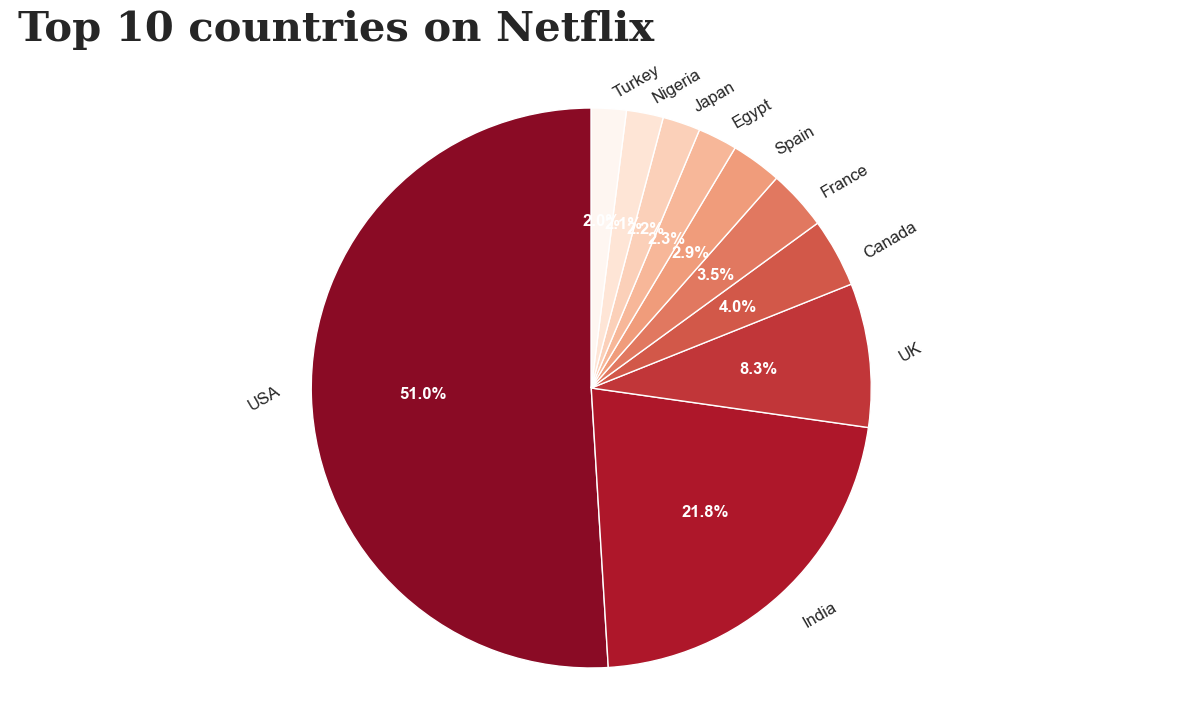

In [33]:
col = "first_country"
countries_grouped = df[col].value_counts().reset_index()
countries_grouped = countries_grouped.rename(columns = {col : "count", "index" : col}).head(10)

#Plot pie chart
fig, ax = plt.subplots(1,1,figsize=(15,8))
textprops=dict(size=12)
# explode = (0.1,0)

patches, texts, pcts = ax.pie(countries_grouped['count'], labels = countries_grouped['first_country'],
                              colors=sns.color_palette("RdGy", n_colors=20),
                              textprops = textprops,shadow=False, startangle=90, 
                              autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.setp(pcts, color='white',fontweight='bold') # Modify text in pie chart
plt.setp(texts, fontweight='500')
[t.set_rotation(30) for t in texts]

#Add title
fig.text(0.13, 0.93, 'Top 10 countries on Netflix', fontsize=30, fontweight='bold', fontfamily='Serif')   

plt.show()

Clearly, the most prolific countries on Netflix are the USA, with India and the UK. The USA and the UK are in line with expectations.
Nevertheless, it is surprisingly that India is second large country of the contents on Netflix.

Ratings distribution
After basic views on our data, now we want to know some difference between movies and TV shows.
Let's briefly check out how ratings are distributed

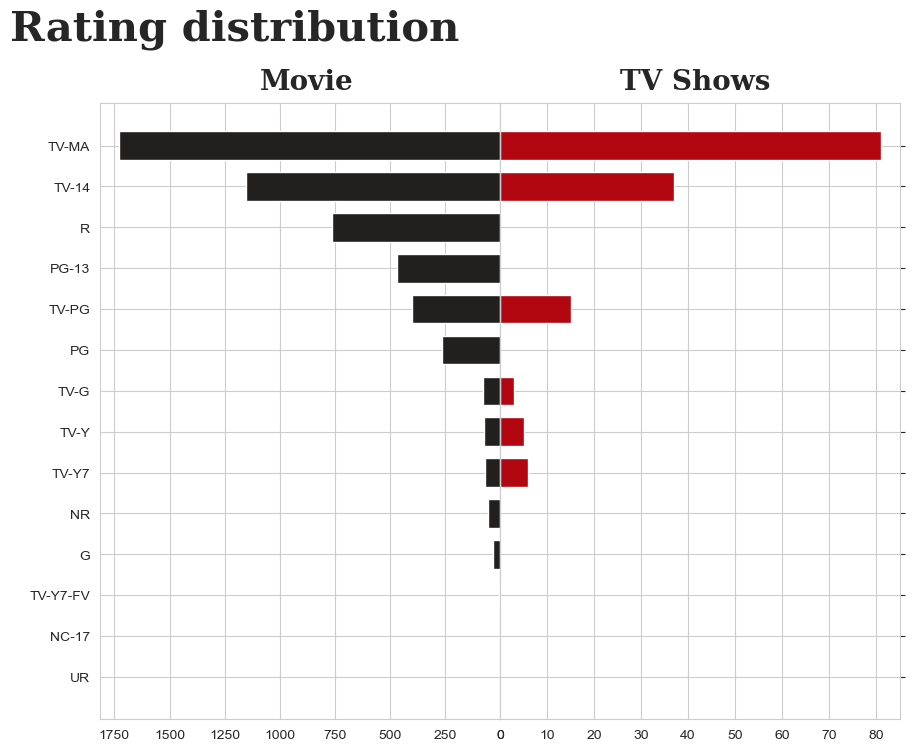

In [34]:
# Rating by TV show and movie
col = 'rating'
df_TVs_rat = df_TVs[col].value_counts().reset_index()
df_TVs_rat = df_TVs_rat.rename(columns = {col: 'TV show', 'index': col})
df_Movies_rat = df_Movies[col].value_counts().reset_index()
df_Movies_rat = df_Movies_rat.rename(columns = {col: 'Movie', 'index': col})
df_total_rat = pd.merge(df_Movies_rat, df_TVs_rat, how = 'left', left_on = 'rating', right_on = 'rating').sort_values(by='Movie',ascending=False)[::-1]

fig, axes = plt.subplots(ncols = 2, sharey = True, figsize = (10,7))
axes[0].barh(df_total_rat[col], df_total_rat['Movie'], align = 'center', color = color_TV, height = 0.7)
axes[1].barh(df_total_rat[col], df_total_rat['TV show'], align = 'center', color = color_movie, height = 0.7)
axes[0].invert_xaxis()
axes[1].yaxis.tick_right()
axes[0].yaxis.set_offset_position('right')

fig.text(0.01, 1.07, 'Rating distribution', fontsize=30, fontweight='bold', fontfamily='Serif')   
fig.text(0.26, 1.00, 'Movie', fontsize=20, fontweight='bold', fontfamily='Serif')   
fig.text(0.62, 1.00, 'TV Shows', fontsize=20, fontweight='bold', fontfamily='Serif')  
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.98, wspace=0.)
plt.show()


It is evident that certain ratings only apply to movies. Additionally, the most frequently occurring rating for both movies and TV shows is TV-MA.

Content released trend by country
Then, we want to know if every contries' content have decreased.

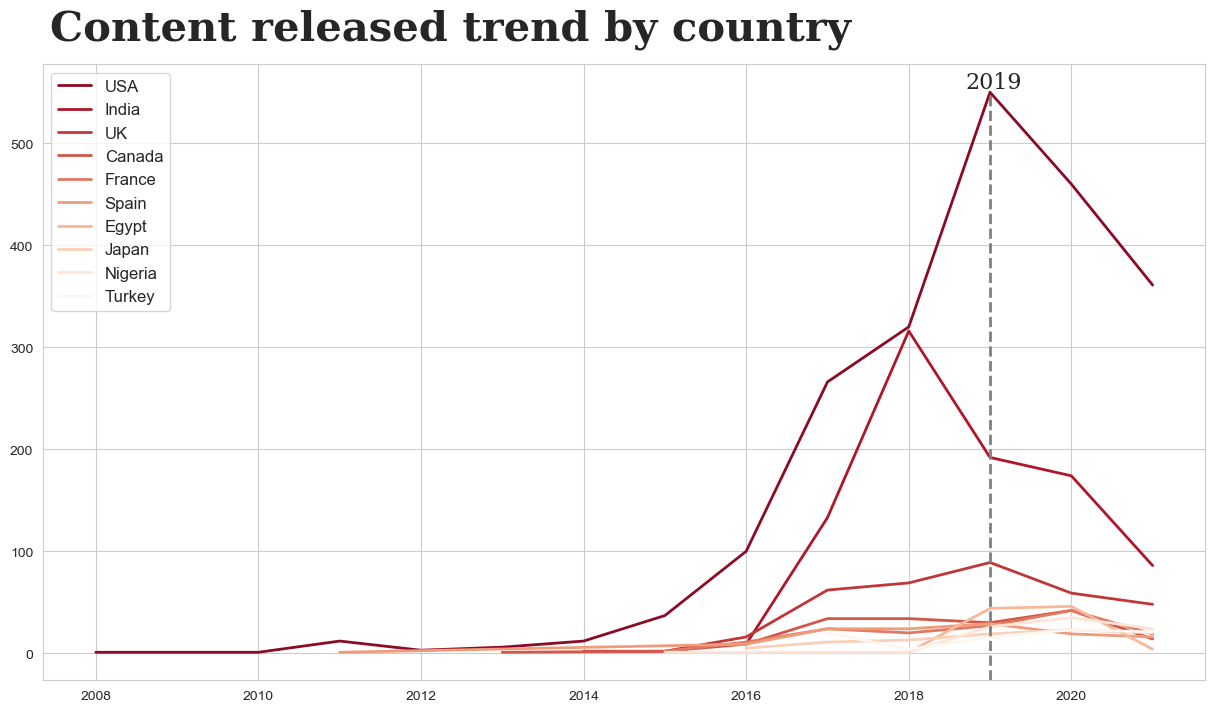

In [35]:
countries = countries_grouped['first_country'].tolist()
pal = sns.color_palette("RdGy", 20).as_hex()

fig, ax = plt.subplots(1,1,figsize = (15,8))
for country in countries:
    df1 = df[df['first_country'] == country]
    grouped = df1['year_added'].value_counts().reset_index()
    grouped = grouped.rename(columns = {'year_added' : "total_count", "index" : 'year_added'})
    grouped = grouped.sort_values("year_added")

    ax.plot(grouped['year_added'], grouped['total_count'], c=pal[countries.index(country)], label = country, lw=2)

ax.axvline(x=2019, ymin=0, ymax=0.95, c='grey', ls='--', lw=2)

fig.text(0.74, 0.85, '2019', fontsize=16, fontfamily='Serif') 
fig.text(0.13, 0.91, 'Content released trend by country', fontsize=30, fontweight='bold', fontfamily='Serif') 
ax.legend(loc = 'upper left', fontsize = 'large')
plt.show()

Since 2019, it appears that the number of films available on Netflix has decreased across all countries.